$I$ $didn't$ $choose$ $the$ $statsLyfe$ $-$ $the$ $statsLyfe$ $chose$ $me!$

*Yes, I wrote the above in LaTeX ;)*

**With that out of the way...**

The purpose of this notebook is to be my own exploration into various Statistical Tests

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### ✅ 1. Chi-Squared Test (using `scipy.stats.chi2_contingency`)

**Purpose:** Test independence between two categorical variables.

**Dataset:** Titanic data from Seaborn

In [4]:
# A Contingency Table (crosstab) and Chi^2:

from scipy.stats import chi2_contingency

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Create a contingency table of 'sex' vs 'survived'
contingency_table = pd.crosstab(
    titanic['sex'], titanic['survived'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(
    contingency_table)

contingency_table

print("Chi-Squared Statistic:", chi2)
print("p-value:", p)
print("deg of frdm:", dof)

survived,0,1
sex,,
female,81,233
male,468,109


Chi-Squared Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
deg of frdm: 1


### ✅ 2. Fisher's Exact Test (using `scipy.stats.fisher_exact`)

**Purpose:** Test independence between two categorical variables in a **2x2** table.

**Dataset:** Titanic (again, suitable for 2x2 test)

In [3]:
# Fisher's Exact and computing an Odds Ratio:

from scipy.stats import fisher_exact

# Filter to only adults and drop NaNs
data = titanic.dropna(subset=['sex', 'survived'])
table = pd.crosstab(data['sex'], data['survived'])

# Ensure it's a 2x2 table
table = table.iloc[:2, :2]

# Fisher's exact test
odds_ratio, p_value = fisher_exact(table)

table

print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

survived,0,1
sex,,
female,81,233
male,468,109


Odds Ratio: 0.08096731594585672
p-value: 6.463921564583144e-60


In [12]:
print("Fisher's Exact Table:\n\n",fisher_exact(table))

Fisher's Exact Table:

 SignificanceResult(statistic=0.08096731594585672, pvalue=6.463921564583144e-60)


### ✅ 3. T-Test (using `statsmodels.stats.api.ttest_ind`)

**Purpose:** Compare means between two independent groups.

**Dataset:** Penguins dataset (Seaborn)

In [6]:
import statsmodels.stats.api as sms
import seaborn as sns

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Drop NA values for clean comparison
penguins = penguins.dropna(
    subset=['species', 'flipper_length_mm'])

# Compare flipper lengths between Adelie and Gentoo penguins
group1 = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
group2 = penguins[penguins['species'] == 'Gentoo']['flipper_length_mm']

# Perform t-test
t_stat, p_value, dof = sms.ttest_ind(
    group1, group2)

print("T-statistic:", t_stat)
print("p-value:", p_value)
print("DoF:", dof)

T-statistic: -34.41495797176763
p-value: 4.211309078100972e-101
DoF: 272.0


### ✅ 4. Pearson Correlation (using `scipy.stats.pearsonr`)

**Purpose:** Measure linear correlation between two continuous variables.

**Dataset:** Penguins dataset again

In [8]:
from scipy.stats import pearsonr

# Drop NA
data = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm'])

# Pearson correlation
corr, p_value = pearsonr(
    data['bill_length_mm']
    , data['flipper_length_mm']
)

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.656181340746428
p-value: 1.7439736176204127e-43


### ✅ 5. Spearman Correlation (using `scipy.stats.spearmanr`)

**Purpose:** Measure monotonic relationship (non-parametric).

**Dataset:** Penguins dataset

In [9]:
from scipy.stats import spearmanr

# Spearman correlation
corr, p_value = spearmanr(data['bill_length_mm'], data['flipper_length_mm'])

print("Spearman correlation coefficient:", corr)
print("p-value:", p_value)

Spearman correlation coefficient: 0.6727719416255543
p-value: 2.0669356276079494e-46


## ✅ Summary Table

| Test | Library Used | Dataset | Columns |
| --- | --- | --- | --- |
| Chi-Squared | `scipy.stats` | Titanic | `sex`, `survived` |
| Fisher's Exact | `scipy.stats` | Titanic (2x2) | `sex`, `survived` |
| T-Test | `statsmodels.stats` | Penguins | `flipper_length_mm`, `species` |
| Pearson Correlation | `scipy.stats` | Penguins | `bill_length_mm`, `flipper_length_mm` |
| Spearman Correlation | `scipy.stats` | Penguins | `bill_length_mm`, `flipper_length_mm` |

***But wait - theres moar!***

### ✅ 6. **ANOVA (Analysis of Variance)**

**Use case:** Compare **means across more than two groups**.

In [11]:
from scipy.stats import f_oneway

group1 = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
group2 = penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm']
group3 = penguins[penguins['species'] == 'Gentoo']['flipper_length_mm']

f_stat, p = f_oneway(
    group1, group2, group3
)
print("F-statistic:", f_stat)
print("p-value:", p)

F-statistic: 594.8016274385172
p-value: 1.3517103385730013e-111


### ✅ 7. **Shapiro-Wilk Test** (Normality check)

**Use case:** Test if a sample comes from a **normal distribution**.

In [12]:
from scipy.stats import shapiro

data = penguins['flipper_length_mm'].dropna()
stat, p = shapiro(data)

print("Shapiro-Wilk statistic:", stat)
print("p-value:", p)

Shapiro-Wilk statistic: 0.9515460133552551
p-value: 3.541138271501154e-09


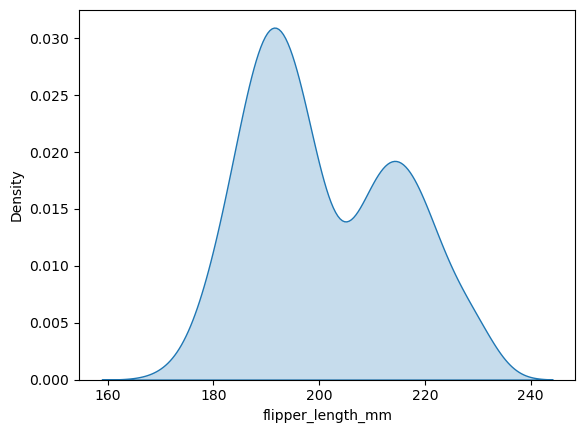

In [16]:
import seaborn as sns

sns.kdeplot(data, fill=True);